In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ISLP import load_data, confusion_table
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.metrics import RocCurveDisplay
roc_curve_est = RocCurveDisplay.from_estimator 
roc_curve_pred = RocCurveDisplay.from_predictions
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR,
      RandomForestClassifier as RC, 
      GradientBoostingClassifier as GBC)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold as SKF
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      ShuffleSplit)
from sklearn.decomposition import PCA
from sklearn.base import clone
from ISLP.models import sklearn_sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import make_scorer, recall_score
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import statsmodels as sm
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize)
import math 

In [2]:
data = pd.read_csv("Cancer_Data.csv").drop(columns={"Unnamed: 32"})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = data.drop(columns={"diagnosis"})
y = data["diagnosis"].map({"M": 1, "B": 0}).astype(int)
X = X.drop(columns={"id"})
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

kf = KFold(n_splits=5, random_state=69, shuffle=True)
feature_importances = pd.DataFrame(index=X.columns)
accuracy_scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    # Drop highly correlated features
    corr_matrix = X_train_scaled.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > 0.7)]
    X_train_clean = X_train_scaled.drop(columns=to_drop)
    X_test_clean = X_test_scaled.drop(columns=to_drop)

    # Train random forest
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_clean, y_train)

    # Predict and score
    y_pred = model.predict(X_test_clean)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Save feature importances for this fold
    #Each decision tree in the forest splits on features to reduce the Gini impurity
    importances = pd.Series(model.feature_importances_, index=X_train_clean.columns)
    feature_importances[f'Fold_{i+1}'] = importances

# Compute mean importances across folds
feature_importances['Mean'] = feature_importances.mean(axis=1)
feature_importances = feature_importances.sort_values(by='Mean', ascending=False)

print("Cross-validated accuracy scores:", accuracy_scores)
print("Average feature importances:")
print(feature_importances['Mean'])


Cross-validated accuracy scores: [0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9734513274336283]
Average feature importances:
radius_mean                0.423150
compactness_mean           0.169287
texture_mean               0.120189
symmetry_worst             0.088569
smoothness_mean            0.058699
fractal_dimension_mean     0.044121
symmetry_mean              0.040416
symmetry_se                0.033200
texture_se                 0.030314
smoothness_se              0.027482
perimeter_mean                  NaN
area_mean                       NaN
concavity_mean                  NaN
concave points_mean             NaN
radius_se                       NaN
perimeter_se                    NaN
area_se                         NaN
compactness_se                  NaN
concavity_se                    NaN
concave points_se               NaN
fractal_dimension_se            NaN
radius_worst                    NaN
texture_worst                   NaN
perimeter

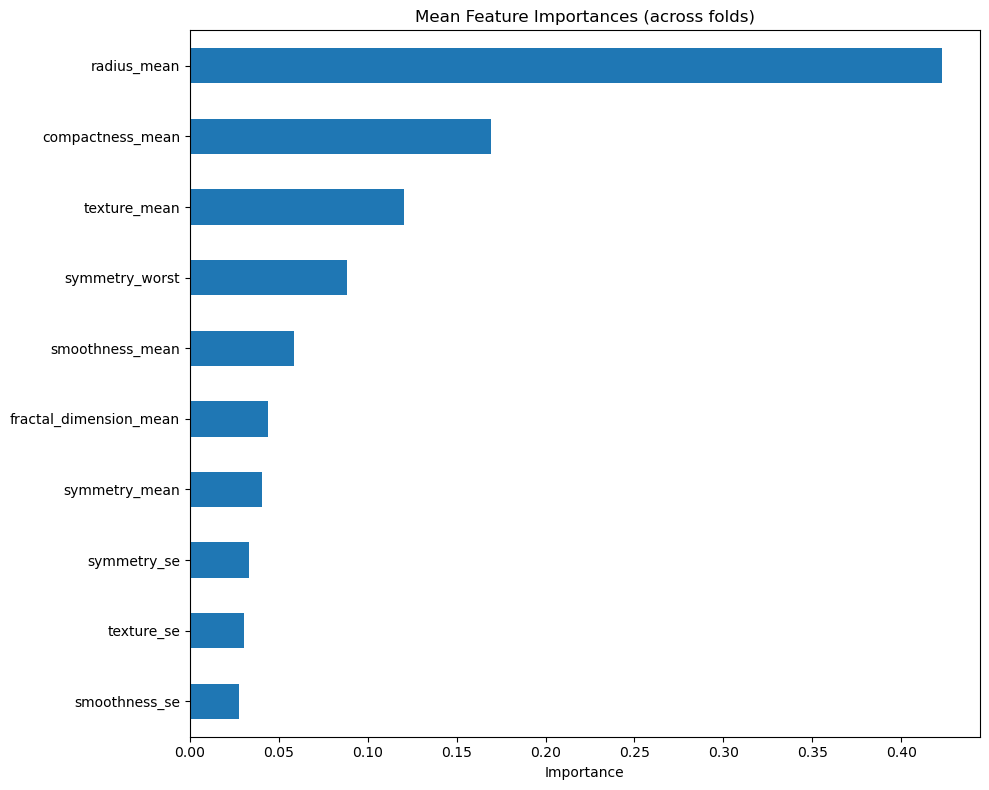

In [7]:
import matplotlib.pyplot as plt

# Drop features with all-NaN importances
mean_importances = feature_importances['Mean'].dropna()

# Sort for a nicer plot
mean_importances = mean_importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
mean_importances.plot(kind='barh')
plt.title('Mean Feature Importances (across folds)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()
